# Spatial Analysis in Geology using R

## by Pedro Nogueira

<span style="color:red;"> 
    <h1> 11. Going vectorial </h1>
</span>

In [ ]:
#11-00
# Settings


# Print the R version information
print(R.version)

# Verify thw working directory
wd_base = getwd()
print(wd_base)

<span style="color:green;"> 
    <h2> 11.1. Sources of vectorial spatial data </h2>
</span>

<span style="color:green;"> 
    <h2> 11.2. Read and write spatial data </h2>
</span>

In [3]:
#11-01
# Load the library
library(sp)

# Create a data frame
data = data.frame(name = c("New York City", "Los Angeles", "Chicago", "Houston"), 
                  lat = c(40.7128, 34.0522, 41.8781, 29.7604), 
                  lng = c(-74.0060, -118.2437, -87.6298, -95.3698))

In [4]:
#11-02
# Create a sp object
coordinates(data) = c("lng", "lat")

# Define the crs
proj4string(data) = CRS("+proj=longlat +datum=WGS84 +no_defs")

# Verify the data type
str(data)

Formal class 'SpatialPointsDataFrame' [package "sp"] with 5 slots
  ..@ data       :'data.frame':	4 obs. of  1 variable:
  .. ..$ name: chr [1:4] "New York City" "Los Angeles" "Chicago" "Houston"
  ..@ coords.nrs : int [1:2] 3 2
  ..@ coords     : num [1:4, 1:2] -74 -118.2 -87.6 -95.4 40.7 ...
  .. ..- attr(*, "dimnames")=List of 2
  .. .. ..$ : NULL
  .. .. ..$ : chr [1:2] "lng" "lat"
  ..@ bbox       : num [1:2, 1:2] -118.2 29.8 -74 41.9
  .. ..- attr(*, "dimnames")=List of 2
  .. .. ..$ : chr [1:2] "lng" "lat"
  .. .. ..$ : chr [1:2] "min" "max"
  ..@ proj4string:Formal class 'CRS' [package "sp"] with 1 slot
  .. .. ..@ projargs: chr "+proj=longlat +datum=WGS84 +no_defs"
  .. .. ..$ comment: chr "GEOGCRS[\"unknown\",\n    DATUM[\"World Geodetic System 1984\",\n        ELLIPSOID[\"WGS 84\",6378137,298.25722"| __truncated__


In [5]:
#11-03
# Load the Library
library(sf)

# Convert to sf
data_sf = st_as_sf(data, coords = c("lng", "lat"), crs = 4326)

# Verify the results
str(data_sf)

Classes ‘sf’ and 'data.frame':	4 obs. of  2 variables:
 $ name    : chr  "New York City" "Los Angeles" "Chicago" "Houston"
 $ geometry:sfc_POINT of length 4; first list element:  'XY' num  -74 40.7
 - attr(*, "sf_column")= chr "geometry"
 - attr(*, "agr")= Factor w/ 3 levels "constant","aggregate",..: NA
  ..- attr(*, "names")= chr "name"


In [6]:
#11-04/01
# Load the library
library(jsonlite)

# Convert to JSON
json_data = toJSON(data_sf)

# Verify the structure
str(json_data)

 'json' chr "[{\"name\":\"New York City\",\"geometry\":{\"type\":\"Point\",\"coordinates\":[-74.006,40.7128]}},{\"name\":\"L"| __truncated__


In [7]:
#11-04/02
# View the data
json_data

[{"name":"New York City","geometry":{"type":"Point","coordinates":[-74.006,40.7128]}},{"name":"Los Angeles","geometry":{"type":"Point","coordinates":[-118.2437,34.0522]}},{"name":"Chicago","geometry":{"type":"Point","coordinates":[-87.6298,41.8781]}},{"name":"Houston","geometry":{"type":"Point","coordinates":[-95.3698,29.7604]}}] 

In [8]:
#11-05
# Save the data
st_write(data_sf, "gpx_data_file.gpx", driver = "GPX")

Writing layer `gpx_data_file' to data source `gpx_data_file.gpx' using driver `GPX'
Writing 4 features with 1 fields and geometry type Point.


Warning message in CPL_write_ogr(obj, dsn, layer, driver, as.character(dataset_options), :
“GDAL Message 1: Value 'New York City' of field gpx_data_file.ele parsed incompletely to real 0.”
Warning message in CPL_write_ogr(obj, dsn, layer, driver, as.character(dataset_options), :
“GDAL Message 1: Value 'Los Angeles' of field gpx_data_file.ele parsed incompletely to real 0.”
Warning message in CPL_write_ogr(obj, dsn, layer, driver, as.character(dataset_options), :
“GDAL Message 1: Value 'Chicago' of field gpx_data_file.ele parsed incompletely to real 0.”
Warning message in CPL_write_ogr(obj, dsn, layer, driver, as.character(dataset_options), :
“GDAL Message 1: Value 'Houston' of field gpx_data_file.ele parsed incompletely to real 0.”


In [9]:
#11-06
# Save the data
st_write(data_sf, "kml_data_file.kml", driver = "KML")

Writing layer `kml_data_file' to data source `kml_data_file.kml' using driver `KML'
Writing 4 features with 1 fields and geometry type Point.


<span style="color:green;"> 
    <h2> 11.3 OpenStreetmap: a source of geographic data </h2>
</span>

In [ ]:
#11-07/01
# Install remotes package
install.packages("remotes")

# Install the 'osmdata' package
remotes::install_github ("ropensci/osmdata")

In [11]:
#11-07/02
# Load the library
library(osmdata)
library(sf)

# Create the query
osm_query = opq(bbox = getbb("Ilha do Pico, Portugal"))

# Define the features in the query
osm_query_point = add_osm_feature(osm_query, key="natural", value =
c("volcano","peak"))

# Retrieve the results
pico_volcano_peak = osmdata_sf(osm_query_point)

# View the results
pico_volcano_peak

Data (c) OpenStreetMap contributors, ODbL 1.0. https://www.openstreetmap.org/copyright

Object of class 'osmdata' with:
                 $bbox : 38.3820698,-28.5418993,38.5614291,-28.0281952
        $overpass_call : The call submitted to the overpass API
                 $meta : metadata including timestamp and version numbers
           $osm_points : 'sf' Simple Features Collection with 25 points
            $osm_lines : NULL
         $osm_polygons : 'sf' Simple Features Collection with 0 polygons
       $osm_multilines : NULL
    $osm_multipolygons : NULL




In [12]:
#11-07/03
# Create the query
osm_query = opq(bbox = getbb("Ilha do Pico, Portugal"))

# Define the features in the query
osm_query_all = add_osm_feature(osm_query, key="natural")

In [13]:
#11-07/04
# Retrieve the results
pico_island_all = osmdata_sf(osm_query_all)

# Show the results
pico_island_all

Object of class 'osmdata' with:
                 $bbox : 38.3820698,-28.5418993,38.5614291,-28.0281952
        $overpass_call : The call submitted to the overpass API
                 $meta : metadata including timestamp and version numbers
           $osm_points : 'sf' Simple Features Collection with 21874 points
            $osm_lines : 'sf' Simple Features Collection with 184 linestrings
         $osm_polygons : 'sf' Simple Features Collection with 285 polygons
       $osm_multilines : NULL
    $osm_multipolygons : 'sf' Simple Features Collection with 6 multipolygons




In [14]:
#11-07/05
# Create a points data
pico_volcano = pico_volcano_peak$osm_points

# Set the crs
st_crs(pico_volcano) = 4326

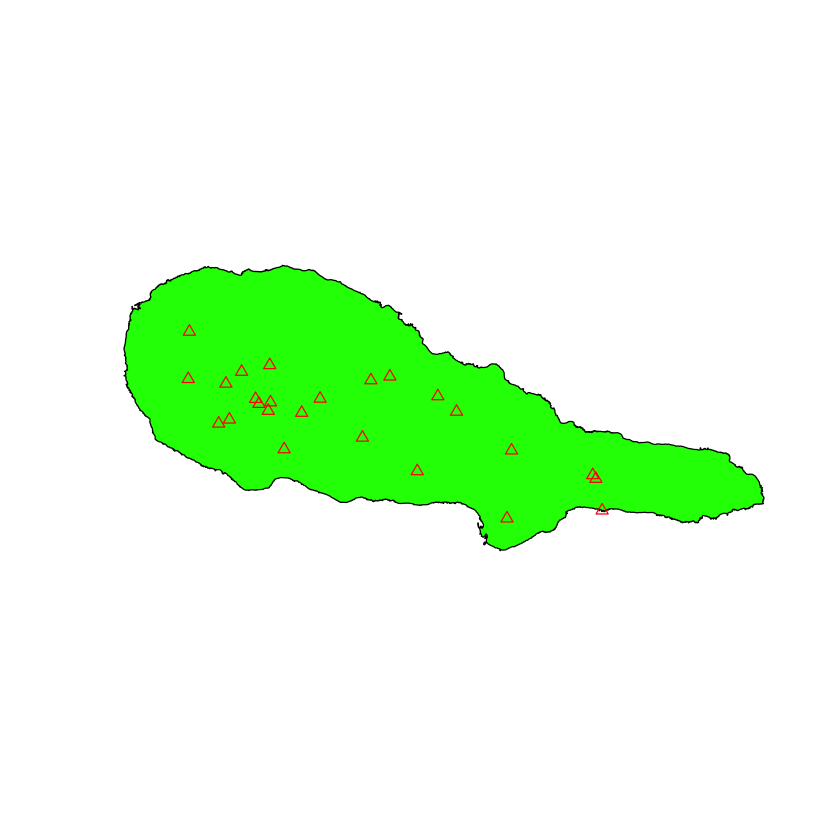

In [15]:
#11-07/06
# Use opq to define the query
osm_query = opq(bbox = getbb("Ilha do Pico, Portugal"))

# Define the features to extract
pico_land = add_osm_feature(osm_query, key="name", value = "Ilha do Pico")

# Retrieve the results
pico = osmdata_sf(pico_land)

# Create a polygons data
pico_out = pico$osm_multipolygons$geometry

# Set the crs
st_crs(pico_out) = 4326

# Plot the results
plot(pico_out, col="green")
points(as_Spatial(pico_volcano), pch=2, col="red")

<span style="color:green;"> 
    <h2> 11.4. Visualising spatial data </h2>
</span>

In [ ]:
#11-08
# Load the packages
library(sp)
library(ggplot2)

# Load the meuse dataset
data(meuse)

# Plot the SpatialPointsDataFrame using ggplot2
ggplot(data = meuse, aes(x = x, y = y)) + 
    geom_point() + 
    coord_equal() + 
    ggtitle("Meuse Dataset")

In [ ]:
#11-09
# Load the libraries
library(sp)
library(leaflet)

# load the meuse dataset
data(meuse)

# Pointer to an icon
ss_icon_url = "https://wiki.openstreetmap.org/w/images/thumb/e/e3/Volcano-8.svg/8px-Volcano-8.svg.png"

# Convert the meuse data.frame to a SpatialPointsDataFrame
coordinates(meuse) = c("x", "y")
proj4string(meuse) = CRS("+init=epsg:28992")

# create a new projection object
new_proj = CRS("+proj=longlat +datum=WGS84")

# reproject the data
meuse_reproj = spTransform(meuse, new_proj)

# copy the transformed data to the meuse data set
meuse_map = meuse_reproj

# create a leaflet map centred on the study area
leaflet(meuse_map) %>% addTiles() %>%
    addMarkers(icon = makeIcon(ss_icon_url, 
                               iconWidth = 10, iconHeight = 10), 
               popup = ~paste("Zinc:", meuse_map$zinc,"ppm<br>", "Cadmium:", meuse_map$cadmium, "ppm"))

In [ ]:
#11-10/01
# Load the libraries
library(raster)
library(sp)

# Define the working folder
setwd("Spatial/Roads Pt")
      
# Define the link to the data
url ="https://biogeo.ucdavis.edu/data/diva/rds/PRT_rds.zip"
      
# Download the data
download.file(url, destfile = "Roads_Pt.zip")
      
# unzip the file
unzip(zipfile = "Roads_Pt.zip", exdir = 'Roads Pt')
      
# Read the shapefile
roads_pt = shapefile("~/Documents/Jupyter Notebooks/SAGR/Roads Pt/PRT_roads.shp")

In [18]:
# Load the libraries
library(raster)
library(sp)
# Read the shapefile
roads_pt = shapefile("~/Documents/Jupyter Notebooks/SAGR/Roads Pt/PRT_roads.shp")

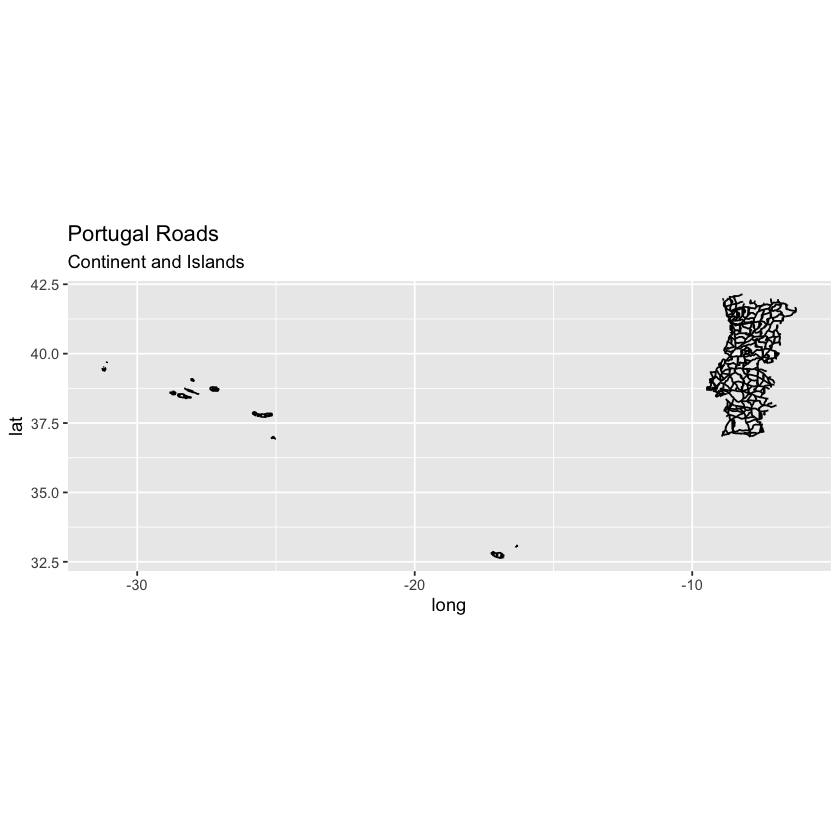

In [33]:
#11-10/02
# Improved plot with ggplot
ggplot(data = roads_pt, aes(x = long, y = lat, group=group)) +
    geom_line() +
    coord_fixed() +
    labs(title = "Portugal Roads", subtitle = "Continent and Islands")

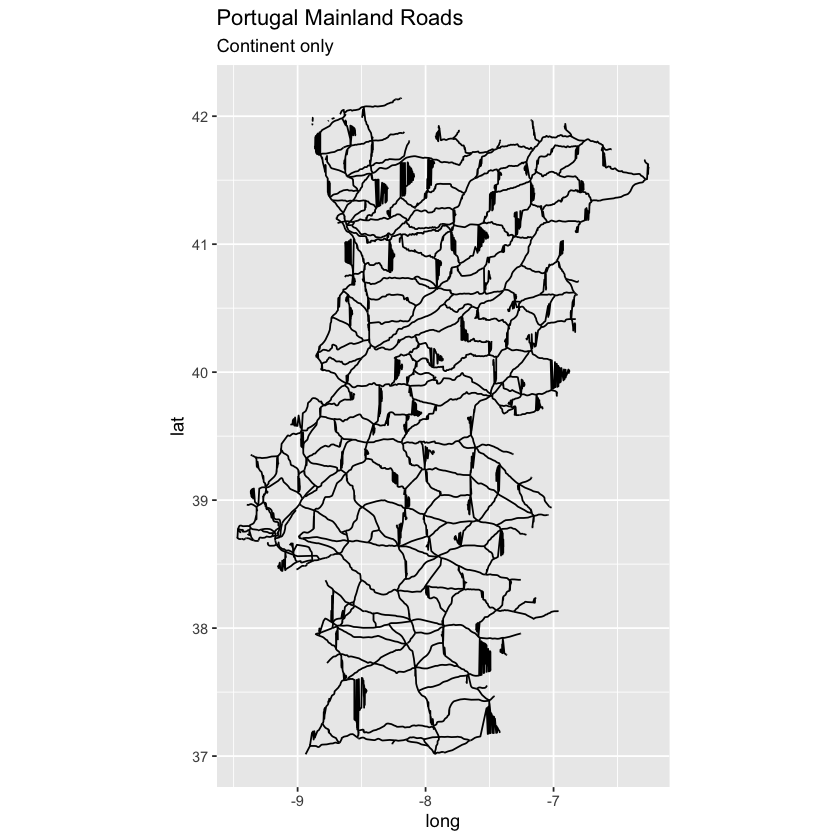

In [22]:
#11-11
# Crop the data
roads_cont = crop(roads_pt, extent(-10,-6,36.25,42.5))

# Improved plot with ggplot
ggplot(data = roads_cont, aes(x = long, y = lat, group=group)) +
    geom_line() + 
    coord_fixed() +
    labs(title = "Portugal Mainland Roads", subtitle = "Continent only")

In [24]:
#11-12
library(leaflet)

# create the roads leaflet map
leaflet(roads_cont) %>%
    addTiles() %>%
    addPolylines(color = "red", popup = ~paste(roads_cont$RTT_DESCRI))

HTML widgets cannot be represented in plain text (need html)

In [ ]:
#11-13/01
# Geology of europe example
# Read the libraries
library(ggplot2)
library(sp)
library(sf)
library(ggspatial)

# Define the url
# url = "https://certmapper.cr.usgs.gov/data/we/ofr97470i/spatial/shape/geo4_2l.zip"
url = "https://www.sciencebase.gov/catalog/file/get/60abc880d34ea221ce51e621?facet=geo4_2l"

# Download the file
europe_geo = download.file(url, destfile = "Europe geology2.zip" )

# Unzip the file
#unzip(zipfile = "Europe geology.zip", exdir = 'Europe Geology')

# Read the Shapefile
#geo = shapefile("Europe Geology/geo4_2l.shp")

In [27]:
getwd()

[1] "/Users/pnogasmacmini/Documents/Jupyter Notebooks"

In [29]:
#11-13/01 Alternatiive
# Geology of europe example
# Read the libraries
library(ggplot2)
library(sp)
library(sf)
library(ggspatial)
library(raster)


# Read the Shapefile
geo = shapefile("SAGR/Europe Geology/geo4_2l.shp")

In [30]:
#11-13/02
# create a new projection object
wgs84 = CRS("+proj=longlat +datum=WGS84")

# reproject the data
geo_r = spTransform(geo, wgs84)

# Define the extension to crop and then crop the file
ned_bb = extent(3.3627721, 7.2272718, 50.7503837, 53.5594849)
ned_geol = crop(geo_r,ned_bb)

In [31]:
#11-13/03
# Verify the geological units present in the cropped area
unique(ned_geol$GLG)

# Create a color array for the Geological map
color_array = c(
    rgb(165,172,195, maxColorValue = 255),
    rgb(251,248,167, maxColorValue = 255),
    rgb(140,138,183, maxColorValue = 255),
    rgb(241,246,250, maxColorValue = 255),
    rgb(210,223,177, maxColorValue = 255),
    rgb(246,237,159, maxColorValue = 255),
    rgb(236,226,199, maxColorValue = 255),
    rgb(188,173,193, maxColorValue = 255),
    rgb(252,250,213, maxColorValue = 255),
    rgb(235,242,249, maxColorValue = 255),
    rgb(164,199,212, maxColorValue = 255),
    rgb(227,201,73, maxColorValue = 255))

[1] "Sea1" "Q"    "H2O"  "K"    "Tr"   "C"    "Pg"   "D"    "N"    "Cm"  
[11] "Pzm"  "Tv"

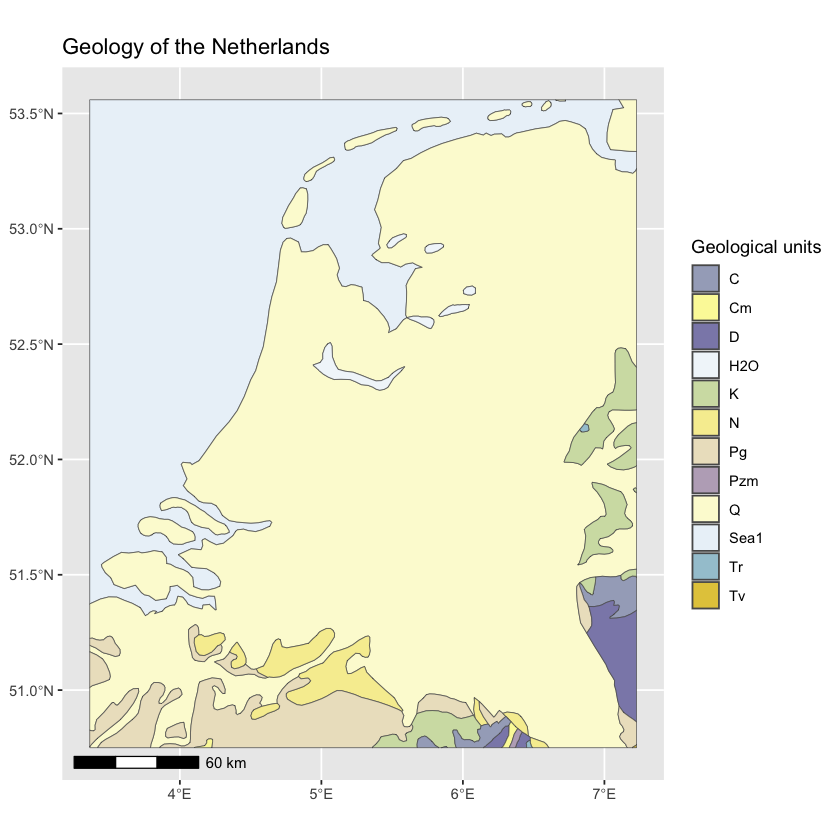

In [32]:
#11-13/04
# Convert sp to sf
ned_geol_sf = as(ned_geol,"sf")

# The plot is made with the geom_sf() function.
ggplot(data = ned_geol_sf) +
    geom_sf(aes(fill = ned_geol_sf$GLG)) +
    scale_fill_manual(values=color_array, name="Geological units") +
    annotation_scale(location = "bl", width_hint = 0.25, text_cex = 0.75) +
    labs(title = "Geology of the Netherlands")

In [ ]:
#11-13/04
# Create a leaflet map
leaflet() %>%
addTiles() %>%
    addPolygons(data = ned_geol_sf,
    fillColor = ~color_array[as.integer(factor(ned_geol_sf$GLG))] ,
    color = "black", weight = 1, opacity = 1, fillOpacity = .7,
    group = "Geological Units") %>%

# Add a legend to the map
addLegend(position = "bottomright", 
          title = "Geological Units",
          colors = color_array, 
          labels = levels(factor(ned_geol_sf$GLG)),
          opacity = 0.7) %>%

# Add a scale bar to the map
addScaleBar(position = "bottomleft", 
            options = scaleBarOptions(imperial = FALSE))

<span style="color:blue;"> 
    <h1> References </h1>
</span>

Pawlewicz, M.J., Steinshouer, D.W., Gautier, D.L., 2002, Map showing geology, oil and gas fields, and geologic provinces of Europe including Turkey: U.S. Geological Survey Open-File Report
97-470-I, 14 p., <a href="https://doi.org/10.3133/ofr97470I">https://doi.org/10.3133/ofr97470I</a>.

Wilkinson, L., Wills, D., Rope, D., Norton, A., & Dubbs, R. (2005). The Grammar of Graphics (2nd ed.). Springer.
